# Setup

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import time

import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

# Data Preprocessing

## Load Data

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_Project/task_1/train.csv', sep = ',')
test_df  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_Project/task_1/test.csv', sep = ',')

In [ ]:
train_col = train_df['x']
test_col  = train_df['x']

## Split the data

In [ ]:
n = len(train_df)

train_data = train_col[0          : int(n*0.8)].to_numpy()
valid_data = train_col[int(n*0.8) :           ].to_numpy()

test_data  = test_col.to_numpy()

## Min Max scale

In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1))

sv = scaler.fit_transform(train_data.reshape(-1, 1))
sv = np.reshape(sv, len(sv))
train = sv

sv = scaler.transform(valid_data.reshape(-1, 1))
sv = np.reshape(sv, len(sv))
valid = sv

sv = scaler.transform(test_data.reshape(-1, 1))
sv = np.reshape(sv, len(sv))
test = sv

In [ ]:
train = train.reshape((train.shape[0], 1))
valid = valid.reshape((valid.shape[0], 1))
test  = test.reshape((test.shape[0]  , 1))

# Split Function

In [ ]:
def split(data, win_size=30, win_shift=6, offset=1):

  rows = np.arange(win_size, len(data) - win_shift - 1, win_shift)

  samples = np.zeros((len(rows), win_size, data.shape[-1]))
  targets = np.zeros((len(rows),))

  for j, row in enumerate(rows):
    samples[j] = data[j * win_shift: row]
    targets[j] = data[row: row + offset]

  return samples, targets

# Windowing

In [ ]:
windows = np.arange(0,96,6)

In [ ]:
windows[0] = 1

In [ ]:
windows

array([ 1,  6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90])

In [ ]:
mae_win = []

for index, win in enumerate(windows):
  start_time = time.time()
  print(index)

  # Data
  x_train, y_train = split(train, win_size=win)
  x_valid, y_valid = split(valid, win_size=win)
  x_test , y_test  = split(test , win_size=win)

  seq_len  = x_train.shape[1]
  num_feat = x_train.shape[2]



  # Model - Training
  lstm = tf.keras.models.Sequential([
      tf.keras.layers.LSTM(16, input_shape = (seq_len, num_feat), return_sequences=True),
      tf.keras.layers.LSTM(8),
      tf.keras.layers.Dense(1, activation='tanh')
  ])

  lstm.compile(loss = 'mae', optimizer='adam')
  history = lstm.fit(x_train, y_train, epochs=40, validation_data=(x_valid, y_valid), verbose=0, batch_size=32, shuffle=False)
  


  # Testing
  
  # make prediction
  prediction_lstm = lstm.predict(x_test)

  # revert scaling
  y_test = y_test.reshape((y_test.shape[0], 1))

  y_test          = scaler.inverse_transform(y_test)
  prediction_lstm = scaler.inverse_transform(prediction_lstm)

  # determine mae
  y_test          = y_test.reshape((y_test.shape[0]))
  prediction_lstm = prediction_lstm.reshape((prediction_lstm.shape[0]))

  mae = mean_absolute_error(prediction_lstm, y_test)
  mae_win.append(mae)

  print("Time taken: %.2fs" % (time.time() - start_time))
  print(f"Mean Absolute Error Autoencoder axes : {mae}")
  print("\n")

0
Time taken: 154.70s
Mean Absolute Error Autoencoder axes : 59.13115723408405


1
Time taken: 175.68s
Mean Absolute Error Autoencoder axes : 65.13648548752687


2
Time taken: 262.60s
Mean Absolute Error Autoencoder axes : 55.273978784966985


3
Time taken: 354.36s
Mean Absolute Error Autoencoder axes : 63.98744936308785


4
Time taken: 434.23s
Mean Absolute Error Autoencoder axes : 55.63128935223401


5
Time taken: 537.36s
Mean Absolute Error Autoencoder axes : 60.95955606736135


6
Time taken: 626.09s
Mean Absolute Error Autoencoder axes : 55.34044126025772


7
Time taken: 752.84s
Mean Absolute Error Autoencoder axes : 63.048678780109434


8
Time taken: 937.71s
Mean Absolute Error Autoencoder axes : 58.61156646066111


9
Time taken: 991.27s
Mean Absolute Error Autoencoder axes : 55.326435688929976


10
Time taken: 1081.96s
Mean Absolute Error Autoencoder axes : 54.85449641818045


11
Time taken: 1234.74s
Mean Absolute Error Autoencoder axes : 54.469471789132605


12
Time taken: 1341.

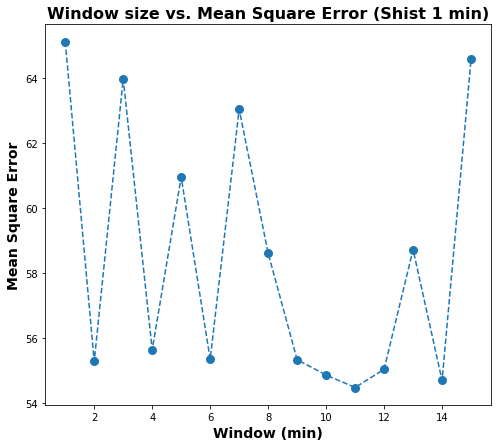

In [18]:
t = np.arange(1,16) 
mae = [
       65.13648548752687,
       55.273978784966985,
       63.98744936308785,
       55.63128935223401,
       60.95955606736135,
       55.34044126025772,
       63.048678780109434,
       58.61156646066111,
       55.326435688929976,
       54.85449641818045,
       54.469471789132605,
       55.03189016964256,
       58.721853266367425,
       54.68732861852343,
       64.59130577309435
      ]

plt.figure(figsize=(8,7))
plt.scatter(t, mae, lw=3)
plt.plot(t, mae, ls='--')
plt.title('Window size vs. Mean Square Error (Shist 1 min)', size=16, fontweight="bold")
plt.xlabel('Window (min)', size=14, fontweight="bold")
plt.ylabel('Mean Square Error', size=14, fontweight="bold")
plt.show()